# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.



Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.

Highly Malignant: It denotes comments that are highly malignant and hurtful.

Rude: It denotes comments that are very rude and offensive.

Threat: It contains indication of the comments that are giving any threat to someone.

Abuse: It is for comments that are abusive in nature.

Loathe: It describes the comments which are hateful and loathing in nature.

ID: It includes unique Ids associated with each comment text given.

Comment text: This column contains the comments extracted from various social media platforms.
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_excel(r'C:\python\MCC.xlsx')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


We have a total of 1,59,571 rows and 8 columns. 
We don't have any importance of the id column.

In [3]:
df_test= pd.read_excel(r'C:\python\test_mcc.xlsx')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159449 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
# Remoivng Column ID
df_train.drop('id',axis=1,inplace=True)

Column Id has no value towards the label. So removing it.

In [7]:
df_train.isnull().sum()

comment_text        122
malignant             0
highly_malignant      0
rude                  0
threat                0
abuse                 0
loathe                0
dtype: int64

In [8]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

In [9]:
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67.0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295.0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99.0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81.0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116.0


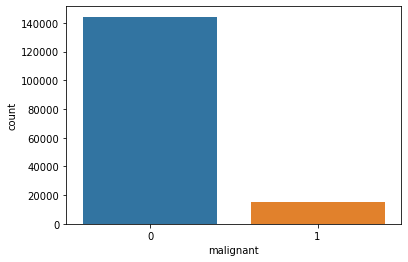

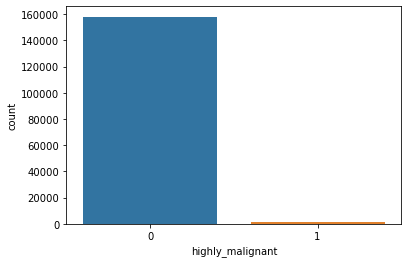

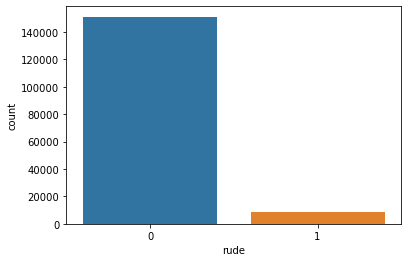

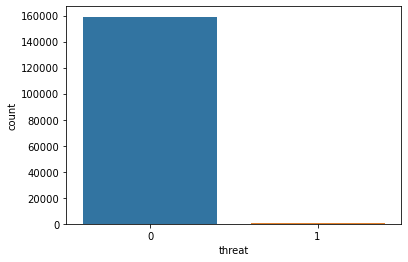

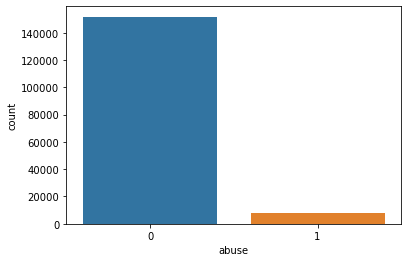

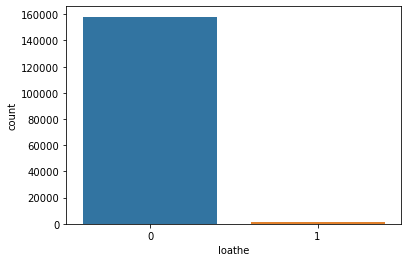

In [10]:
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
for i in columns:
    sns.countplot(df_train[i])
    plt.show()

We can see that in all the columns the comments for 1 is very low and remaining all is mostly 0.

In [11]:
# good comen tvs  bad comments.
Good_comment = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(Good_comment)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


In [12]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

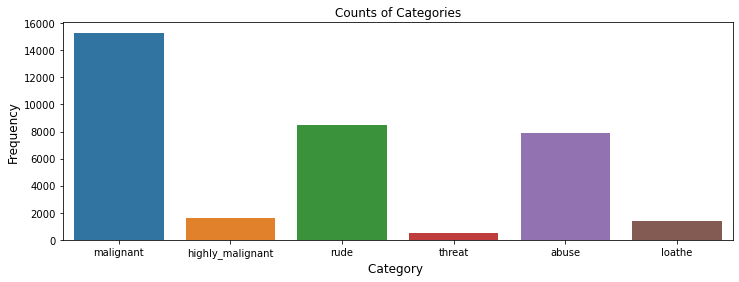

In [13]:
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)

plt.show()

We see that malignant and rude comments are higher 

In [14]:
#Visualizing the label distribution of comments using pie chart
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
df_dist = df_train[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')
df_dist

,count
threat,478
loathe,1405
highly_malignant,1595
abuse,7877
rude,8449
malignant,15294


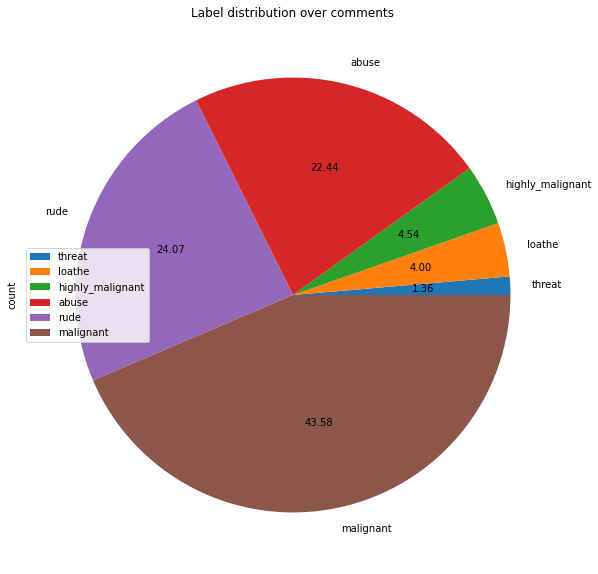

In [15]:
df_dist.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (20, 10))\
                            .legend(loc='center left')

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

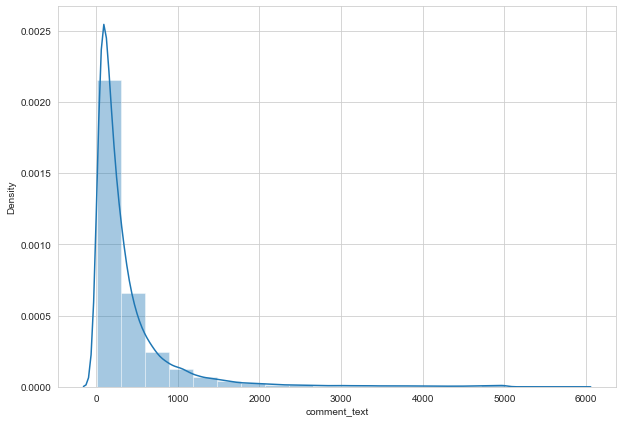

In [16]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20)

we can see that most of the senterence are small.

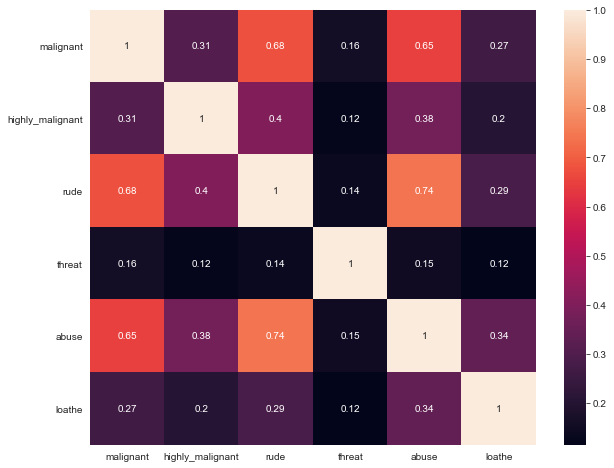

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

We can see more corelations in the variables, Abuse have more corelation with malignant and rude.

Rude has more postive corelation with malignant

we dont have any negative corellations in the data.

In [18]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

In [19]:
df_train['label']=df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum(axis=1)
df_train.head() 

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [20]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [21]:
# checking the length of comments 
# copying df_train into another object df
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,original_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67.0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,67.0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,44.0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,115.0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,472.0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0,70.0


In [22]:
# converting comment text to lowercase 
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264.0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112.0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233.0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622.0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67.0


# Processing Common text

In [23]:
def cleaning(df, df_column_name):
    
    #Converting  messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ ---> ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in str(x).split() if term not in stop_words))

In [24]:
cleaning(df, 'comment_text')
df['comment_text'].tail(3)

159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: comment_text, dtype: object

In [25]:
# Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

In [26]:
# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

In [27]:
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,original_length
82972,numbr numbr cent found homosexual found bed ma...,0,0,0,0,0,0,0,89.0
132642,wikipedia requests checkuser case najiimp plea...,0,0,0,0,0,0,0,84.0
93876,allmovie stop cs ib adventure film indiana jon...,0,0,0,0,0,0,0,169.0
35918,hey kpjas really time go report attacks would ...,0,0,0,0,0,0,0,1925.0
148966,plz stop half knowledge edits hello sitush ple...,0,0,0,0,0,0,0,344.0
43134,mistake attributing lenin comment crossed name...,0,0,0,0,0,0,0,279.0
53224,bertie stupid ignorant cunt humanity favor fol...,1,0,1,1,1,0,4,118.0
140132,hello harrisnumbr welcome wikipedia hope like ...,0,0,0,0,0,0,0,464.0
68123,samev want stay talk page understand going try...,0,0,0,0,0,0,0,533.0
87779,company name changed global cloud xchange,0,0,0,0,0,0,0,48.0


In [28]:
# Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))


In [29]:
df["cleaned_length"] = df.comment_text.str.len()

df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,original_length,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,0,264.0,147
1,aww match background colour seem stuck thank t...,0,0,0,0,0,0,0,112.0,85
2,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0,0,233.0,116
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,0,622.0,311
4,sir hero chanc rememb page,0,0,0,0,0,0,0,67.0,26
5,congratul well use tool well talk,0,0,0,0,0,0,0,67.0,33
6,cocksuck piss around work,1,1,1,0,1,0,4,44.0,25
7,vandal matt shirvington articl revert pleas ban,0,0,0,0,0,0,0,115.0,47
8,sorri word nonsens offens anyway intend write ...,0,0,0,0,0,0,0,472.0,247
9,align subject contrari dulithgow,0,0,0,0,0,0,0,70.0,32


Word Cloud

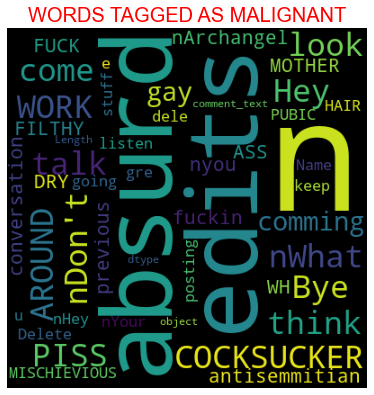

In [30]:
df_malignant=df_train[(df_train['malignant']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Most words used here is foul words that are too harse. Top predicted words mostly used are more than 500 words.

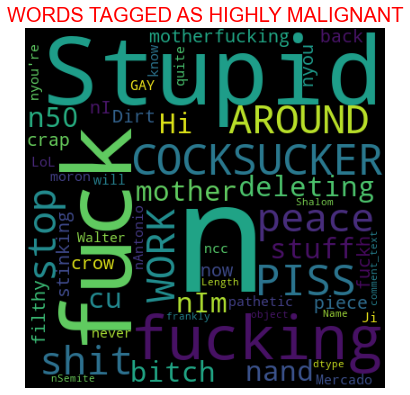

In [31]:
df_malignant=df_train[(df_train['highly_malignant']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Top 400 highly malignant comments are listed here.

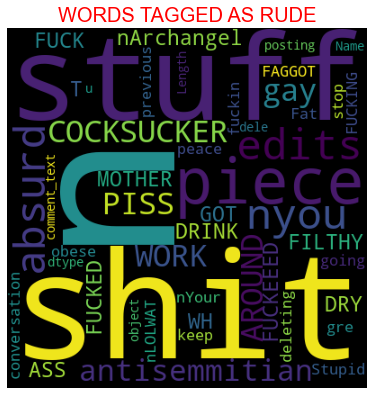

In [32]:
df_malignant=df_train[(df_train['rude']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Words that are classified under rude type of sentences are listed here

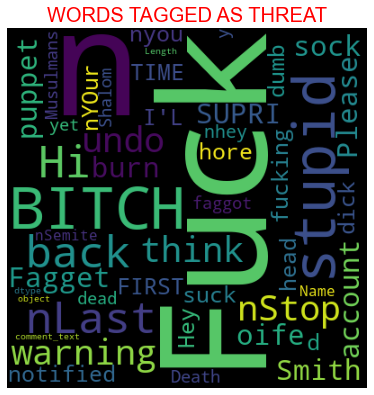

In [33]:
df_malignant=df_train[(df_train['threat']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Words that are classified under rude type of sentences are listed here

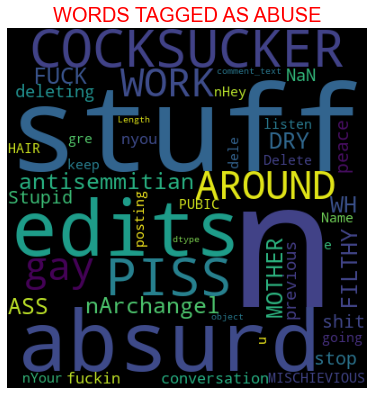

In [34]:
df_malignant=df_train[(df_train['abuse']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Words that are classified under threat type of sentences are listed here

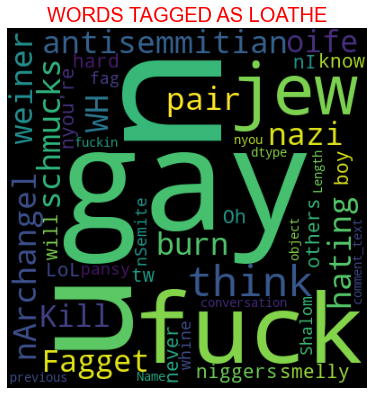

In [35]:
df_malignant=df_train[(df_train['loathe']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

Words that are classified under loathe type of sentences are listed here

In [36]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [37]:
#Let's Separate the input and output variables
x = tf_vec.fit_transform(df['comment_text'])

In [38]:
y =df['label']

In [39]:
x.shape

(159571, 15000)

In [40]:
y.shape

(159571,)

# Train The Model

In [41]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [42]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 1.0 on Random_state 6


# To Find the Best Cross Validation Score

In [43]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [46]:
for j in range(2,10):
    cv_score= cross_val_score(lg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9186004958922196 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 3 the cv score is 0.9196094531925807 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 4 the cv score is 0.9199039904106364 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 5 the cv score is 0.9202110622949341 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 6 the cv score is 0.9201295950719869 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 7 the cv score is 0.9204930704990092 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8


At cross fold 8 the cv score is 0.920305071411767 and accuracy score for training is 0.9324667347744608 and the accuracy for testing is 0.8




# Check The Accuracy and Error

In [47]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=6)

In [48]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Score: 0.9328553252565011
Acc_score: 1.0


In [49]:
cv_score=cross_val_score(lg,x,y, cv=2)
print('Cross Validation Score of LogisticRegression is:', cv_score.mean())

Cross Validation Score of LogisticRegression is: 0.9186004958922196


In [50]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Acc_score: 1.0


In [51]:
cv_score=cross_val_score(dtc,x,y, cv=2)
print('Cross Validation Score of DecisionTreeClassifier is:', cv_score.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.898151920459423


In [52]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Acc_score: 1.0


In [53]:
cv_score=cross_val_score(rf,x,y, cv=2)
print('Cross Validation Score of RandomForestClassifier is:', cv_score.mean())

Cross Validation Score of RandomForestClassifier is: 0.9174223364036995


In [54]:
#knn
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[19  1]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           3       0.00      0.00      0.00         0

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20

Acc_score: 0.95


In [55]:
cv_score=cross_val_score(knn,x,y, cv=2)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: nan


In [56]:
#SVC
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Acc_score: 1.0


In [57]:
cv_score=cross_val_score(svc,x,y, cv=2)
print('Cross Validation Score of SVC is:', cv_score.mean())

Cross Validation Score of SVC is: 0.9186443682642885


# HyperParameter Tuning With GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
LogisticRegression()

LogisticRegression()

In [68]:
parameters={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0,1,2],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter': [50,100,150,200]}

In [65]:
GCV=GridSearchCV(LogisticRegression(), parameters, cv=2, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'C': 2}

In [66]:
GCV.best_estimator_

LogisticRegression(C=2)

In [67]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.95

Trying out some other extra parameters for final model to check if it provides better resultwithout underfitting or over fitting

In [72]:
#Logistic Regression
fnlg=LogisticRegression(penalty='l2', C=2, max_iter=100)
fnlg.fit(xtrain,ytrain)
predfnlg= fnlg.predict(xtest)
print( confusion_matrix(predfnlg,ytest))
print( classification_report(predfnlg,ytest))
print('Score:', fnlg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predfnlg,ytest))

[[19  0  0]
 [ 0  0  1]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.95        20
   macro avg       0.33      0.33      0.33        20
weighted avg       0.95      0.95      0.95        20

Score: 0.9379007339346039
Acc_score: 0.95


In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [75]:
fn_lg =  LogisticRegression(random_state=6)
fn_lg.fit(xtrain,ytrain)

LogisticRegression(random_state=6)

In [77]:
y_pred_prob=fn_lg.predict_proba(xtest)
y_pred_prob

array([[9.79488675e-01, 1.55545605e-02, 3.18180219e-03, 1.41592670e-03,
        2.80536275e-04, 5.28498597e-05, 2.56492830e-05],
       [9.82689809e-01, 1.22483512e-02, 2.24659354e-03, 2.48863778e-03,
        2.40321601e-04, 5.75825280e-05, 2.87042047e-05],
       [9.97100513e-01, 2.09476984e-03, 5.67231459e-04, 1.75635372e-04,
        3.44190962e-05, 2.16482884e-05, 5.78256289e-06],
       [2.57537220e-02, 1.24941902e-01, 2.52264653e-01, 2.65692637e-01,
        2.50233035e-01, 7.86059873e-02, 2.50806294e-03],
       [9.72588699e-01, 2.16143955e-02, 3.62115463e-03, 1.54761183e-03,
        4.67017083e-04, 1.23364981e-04, 3.77571041e-05],
       [9.66646795e-01, 2.30646764e-02, 5.76876995e-03, 3.35857315e-03,
        8.61080617e-04, 2.40278531e-04, 5.98258940e-05],
       [9.99562207e-01, 2.96146884e-04, 7.70650576e-05, 5.23668889e-05,
        8.43450245e-06, 2.53096335e-06, 1.24913939e-06],
       [9.91926246e-01, 5.65505236e-03, 1.33522685e-03, 8.15527995e-04,
        1.93503181e-04, 5

In [79]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, y_pred_prob[:,i], pos_label=i)

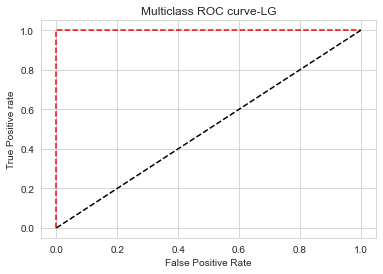

In [80]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve-LG')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

# Saving the final model

In [82]:
import pickle
filename= 'MCC.pkl'
pickle.dump(fnlg,open(filename, 'wb'))

Test Data

In [ ]:
df_test.drop('id',axis=1,inplace=True)

In [86]:
cleaning(df_test, 'comment_text')
df_test['comment_text'].tail(3)

153161    okinotorishima categories see changes agree co...
153162    one founding nations eu germany law return qui...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, dtype: object

In [87]:
xtest = tf_vec.fit_transform(df_test['comment_text'])

In [89]:
import joblib
Malignant_classifier= joblib.load('MCC.pkl')
pred= Malignant_classifier.predict(xtest)

In [90]:
Predicted=pd.DataFrame({"Malignant_classifier":pred})
Predicted.head()

,Malignant_classifier
0,0
1,0
2,0
3,0
4,0


In [91]:
Predicted.value_counts()

Malignant_classifier
0                       151273
1                         1016
2                          512
3                          345
4                           18
dtype: int64

In [92]:
Predicted.to_csv("MCC_Predicted.csv")

I have trained the data with Logistic Regression model and have done the prediction with test data and saved it as "MCC_Predicted.csv"